In [1]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv("test8.csv")
df = np.array(df)

In [11]:
df2 = pd.DataFrame(df, columns=["Title", "Pros", "Cons", "Management Advice"])

In [12]:
df2.head()

,Title,Pros,Cons,Management Advice
0,﻿Excellent place to work,Flexible hours. Restrictions on hrs working. ...,Some unsociable hrs. Self employed.,Some unsociable hrs. Self employed.
1,﻿Uber,Freedom flexibility self management fun,Small pay time consuming high fees rude Cost...,
2,﻿Obersaturation,Flexible working hours Contributes to an acti...,Oversatured - Too many couriers Pay quickly d...,Oversatured - Too many couriers Pay quickly d...
3,﻿great experience,steep learning curve and great motivation,long working hours and not competitive salary,long working hours and not competitive salary
4,﻿I worked less than a year,every thing is all right,no cons. everything is ok,


In [22]:
pros = list(df2["Pros"])

In [25]:
import re
df2["Pros"] = df2["Pros"].map(lambda x: re.sub('[,\.!?]', '', x))

In [27]:
df2["Pros"] = df2["Pros"].map(lambda x: x.lower())

In [28]:
df2.head()

,Title,Pros,Cons,Management Advice
0,﻿Excellent place to work,flexible hours restrictions on hrs working pr...,Some unsociable hrs. Self employed.,Some unsociable hrs. Self employed.
1,﻿Uber,freedom flexibility self management fun,Small pay time consuming high fees rude Cost...,
2,﻿Obersaturation,flexible working hours contributes to an acti...,Oversatured - Too many couriers Pay quickly d...,Oversatured - Too many couriers Pay quickly d...
3,﻿great experience,steep learning curve and great motivation,long working hours and not competitive salary,long working hours and not competitive salary
4,﻿I worked less than a year,every thing is all right,no cons. everything is ok,


In [125]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(df2["Management Advice"])

from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
drivers pay better work people app stop good driver tip

Topic #1:
uber drivers management company make better don time like care

Topic #2:
employees doing people work great company management culture continue uber

Topic #3:
drivers make driver people stop money time uber going don

Topic #4:
drivers uber pay driver increase make customer service don work


# As we can see from the groups above, Topic 0 is about journey details where reviewers tell if the behaviour of the driver is good, it encourages them to pay a good tip. Topic 1 discusses about relationship between employee / drivers and their management. Further, Topic 2 sheds light on the company culture. Topic 3 and 4 informs us about work life and App services respectively. 

c:\users\yash\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_extraction\text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  sorted(inconsistent))


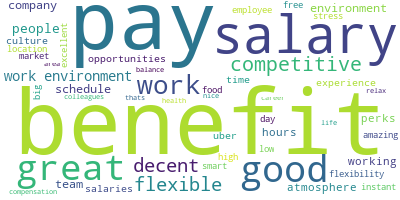

In [121]:
import nltk
import string
lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df2.loc[0] = [" ", "Salary and benefit pay", " ", " "]

TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
tfidf = TfidfVec.fit_transform(df2["Pros"])
vals = cosine_similarity(tfidf[0], tfidf)

pro = []
for i in range(-100,0):
    idx=vals.argsort()[0][i]
    pro.append(df2["Pros"][idx])
pro = pro[::-1]

#pro = np.array(pro)

long_string = ','.join(pro)# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()


# Here we can see that in Pros review, there is a brief discussion about pay, benefits, work culture, environment, etc. These people are more or less happy with the 

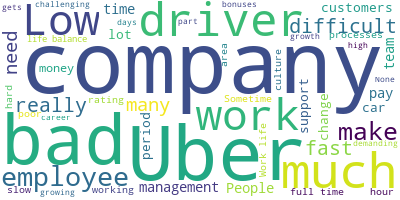

In [107]:
df2.loc[0] = [" ", "Salary and benefit pay", " ", " "]

TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
tfidf = TfidfVec.fit_transform(df2["Cons"])
vals = cosine_similarity(tfidf[0], tfidf)

con = []
for i in range(-100,0):
    idx=vals.argsort()[0][i]
    con.append(df2["Cons"][idx])
con = con[::-1]

#pro = np.array(pro)

long_string = ','.join(con)# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

In [135]:
count = 0
for reviews in df2["Pros"]:
    if "pay" in reviews or "wage" in reviews or "salary" in reviews or "benefit" in reviews:
        count+=1

print("Pros salary discussion count {} %".format(round(((count/6898)*100),2)))

count = 0
for reviews in df2["Cons"]:
    if "pay" in reviews or "wage" in reviews or "salary" in reviews or "benefit" in reviews:
        count+=1

print("Cons salary discussion count {} %".format(round(((count/6898)*100),2)))

count = 0
for reviews in df2["Pros"]:
    if "culture" in reviews or "environment" in reviews or "management" in reviews or "people" in reviews:
        count+=1

print("Pros Work Culture discussion count {} %".format(round(((count/6898)*100),2)))

count = 0
for reviews in df2["Cons"]:
    if "culture" in reviews or "environment" in reviews or "management" in reviews or "people" in reviews:
        count+=1

print("Cons Work Culture discussion count {} %".format(round(((count/6898)*100),2)))


        

Pros salary discussion count 15.66 %
Cons salary discussion count 16.9 %
Pros Work Culture discussion count 31.01 %
Cons Work Culture discussion count 13.73 %


# Here we can see that in both the reviews, people are discussing concerns relating to salary, particularly in cons section. However, though there is a good amount of reviews for work culture on both the sides, we can see the more than double people are happy with work culture at Uber than there are people who aren't.

In [126]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
pyLDAvis.enable_notebook()
vis = sklearn_lda.prepare(lda, count_data,count_vectorizer)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      26.116480        1       1 -0.090558 -0.078499
4      21.402432        1       2 -0.089347  0.042261
2      19.854334        1       3  0.196168 -0.044379
1      19.535218        1       4  0.029892  0.119582
3      13.091536        1       5 -0.046154 -0.038964, topic_info=     Category         Freq         Term        Total  loglift  logprob
term                                                                  
1534  Default  1000.000000      drivers  1000.000000  30.0000  30.0000
1487  Default   204.000000        doing   204.000000  29.0000  29.0000
3452  Default   445.000000          pay   445.000000  28.0000  28.0000
1635  Default   330.000000    employees   330.000000  27.0000  27.0000
2933  Default   224.000000   management   224.000000  26.0000  26.0000
2176  Default   174.000000        great   174.000000  25.0000  25.0000
4903  Default   105.000000          tip   105.000000  24.0000  24.0000
1210  Default    92.000000      culture    92.000000  23.0000  23.0000
4620  Default   209.000000         stop   209.000000  22.0000  22.0000
2469  Default   125.000000     increase   125.000000  21.0000  21.0000
1085  Default    99.000000     continue    99.000000  20.0000  20.0000
343   Default   174.000000          app   174.000000  19.0000  19.0000
3479  Default   445.000000       people   445.000000  18.0000  18.0000
1530  Default   329.000000       driver   329.000000  17.0000  17.0000
3121  Default   170.000000        money   170.000000  16.0000  16.0000
2936  Default    67.000000     managers    67.000000  15.0000  15.0000
5325  Default   413.000000         work   413.000000  14.0000  14.0000
1224  Default   116.000000     customer   116.000000  13.0000  13.0000
563   Default   314.000000       better   314.000000  12.0000  12.0000
183   Default    61.000000          add    61.000000  11.0000  11.0000
4896  Default   230.000000         time   230.000000  10.0000  10.0000
4992  Default    87.000000        treat    87.000000   9.0000   9.0000
2136  Default    73.000000        going    73.000000   8.0000   8.0000
4321  Default   106.000000      service   106.000000   7.0000   7.0000
2924  Default   355.000000         make   355.000000   6.0000   6.0000
4782  Default    49.000000       taking    49.000000   5.0000   5.0000
2315  Default    52.000000       hiring    52.000000   4.0000   4.0000
2312  Default    92.000000         hire    92.000000   3.0000   3.0000
4808  Default   108.000000         team   108.000000   2.0000   2.0000
2654  Default   125.000000          job   125.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
3854   Topic5     9.888801         read    18.171129   1.4248  -6.2203
2924   Topic5    77.137917         make   355.434869   0.5055  -4.1661
4896   Topic5    54.955913         time   230.061838   0.6014  -4.5051
2927   Topic5    27.496805       making    85.328837   0.9008  -5.1976
2508   Topic5     5.727451         info     8.578940   1.6292  -6.7664
1530   Topic5    66.581218       driver   329.517853   0.4340  -4.3132
178    Topic5    26.711535     actually    84.332929   0.8835  -5.2266
361    Topic5     5.234290  appreciated     7.700708   1.6471  -6.8564
4578   Topic5    23.385882        start    77.442190   0.8358  -5.3595
1225   Topic5    26.942254    customers    99.369400   0.7281  -5.2180
1339   Topic5     6.922257      deserve    12.019858   1.4814  -6.5769
1883   Topic5    19.801824        fares    64.662298   0.8498  -5.5259
3479   Topic5    65.128335       people   445.837601   0.1096  -4.3353
1077   Topic5    11.437248      contact    28.627685   1.1157  -6.0748
822    Topic5    20.826795       change    83.310205   0.6469  -5.4754
1534   Topic5    81.032750      drivers  1000.130172  -0.4798  -4.1168
1494   Topic5    36.323143          don   246.711394   0.1174  -4.9192
1985   Topic5    16.958972   

# Topic 1 and 5 have good correlation between them while 3 and 4 stands distinctly amongst others. As shown in the graph, Topic two discusses about both management and work life, it is closely placed between topic 5 and 4. 